<a href="https://colab.research.google.com/github/Vijayak08/Heart-Disease-Prediction/blob/main/Hear_disease_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/Heart_Disease_Prediction.csv")



<h3>Features details and descriptions<h3>

age - age in years</br>
sex - (1 = male; 0 = female)</br>
cp - chest pain type</br>
0: Typical angina: chest pain because of reduced blood supply to the heart</br>
1: Atypical angina: type of chest pain that only has some of the features of
                      typical chest pain</br>
2: Non-anginal pain: chest pain in people without heart disease</br>
3: Asymptomatic: silent heart attack</br>
trestbps - resting blood pressure (in mm Hg)</br>
           above 130-140 is  cause for concern</br>
chol - serum cholestoral in mg/dl</br>
(serum = LDL + HDL + .2 * triglycerides)</br>
above 200 is cause for concern</br>
fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)</br>
'>126' mg/dL signals diabetes</br>
restecg - resting electrocardiographic results</br>
0: Nothing to note</br>
1: ST-T Wave abnormality</br>
can range from mild symptoms to severe problems</br>
signals non-normal heart beat</br>
2: Possible or definite left ventricular hypertrophy</br>
Enlarged heart's main pumping chamber</br>
thalach - maximum heart rate achieved</br>
exang - exercise induced angina (1 = yes; 0 = no)</br>
oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more</br>
slope - the slope of the peak exercise ST segment</br>
0: Upsloping: better heart rate with excercise (uncommon)</br>
1: Flatsloping: minimal change (typical healthy heart)</br>
2: Downslopins: signs of unhealthy heart</br>
ca - number of major vessels (0-3) colored by flourosopy</br>
colored vessel means the doctor can see the blood passing through</br>
the more blood movement the better (no clots)</br>
thal - thalium stress result</br>
1,3: normal</br>
6: fixed defect: used to be defect but ok now</br>
7: reversable defect: no proper blood movement when excercising</br>
target - have disease or not (1=yes, 0=no)</br>

In [ ]:
df.head()


,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [ ]:
df.shape


(270, 14)

In [ ]:
df.dtypes

Age                          int64
Sex                          int64
Chest pain type              int64
BP                           int64
Cholesterol                  int64
FBS over 120                 int64
EKG results                  int64
Max HR                       int64
Exercise angina              int64
ST depression              float64
Slope of ST                  int64
Number of vessels fluro      int64
Thallium                     int64
Heart Disease               object
dtype: object

#Data Quality Checks






In [ ]:
#checking for negative values
for i in dict(df.dtypes):
  if dict(df.dtypes)[i] == 'int64'  or dict(df.dtypes)[i] == 'float64':
    print(i, ":",df[df[i]<0].shape[0])

Age : 0
Sex : 0
Chest pain type : 0
BP : 0
Cholesterol : 0
FBS over 120 : 0
EKG results : 0
Max HR : 0
Exercise angina : 0
ST depression : 0
Slope of ST : 0
Number of vessels fluro : 0
Thallium : 0


In [ ]:
#checking for null and missing values
df.isna().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

In [ ]:
#checking for duplicate values
df.duplicated().sum()

0

In [ ]:
#splitting categorical and continuous features
categorical_val =[]
continuous_val = []
for i in df.columns:
  if len(df[i].unique()) <= 10:
    df[i] = df[i].astype('object')
    categorical_val.append(i)
  else:
    continuous_val.append(i)

print(categorical_val)

['Sex', 'Chest pain type', 'FBS over 120', 'EKG results', 'Exercise angina', 'Slope of ST', 'Number of vessels fluro', 'Thallium', 'Heart Disease']


In [ ]:
#Five-Number summary of the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,270.0,54.433333,9.109067,29.0,48.0,55.0,61.0,77.0
BP,270.0,131.344444,17.861608,94.0,120.0,130.0,140.0,200.0
Cholesterol,270.0,249.659259,51.686237,126.0,213.0,245.0,280.0,564.0
Max HR,270.0,149.677778,23.165717,71.0,133.0,153.5,166.0,202.0
ST depression,270.0,1.050000,1.145210,0.0,0.0,0.8,1.6,6.2


**Ways of detecting extreme values(Outliers)**


1.   BoxPlots
2.   z score
3.   Inter Quantile Range(IQR)






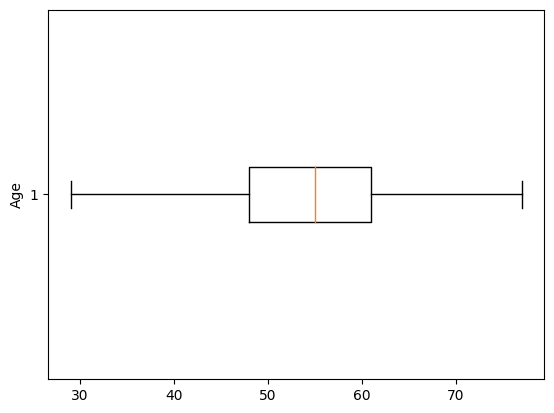

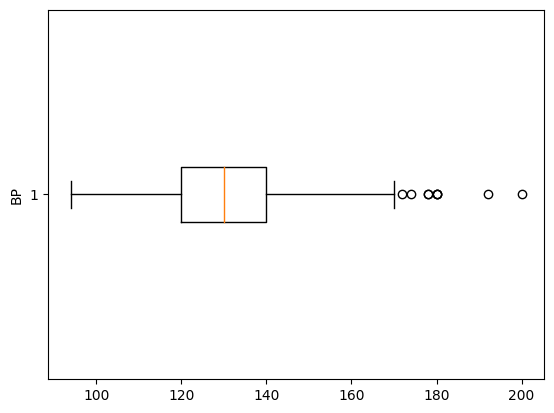

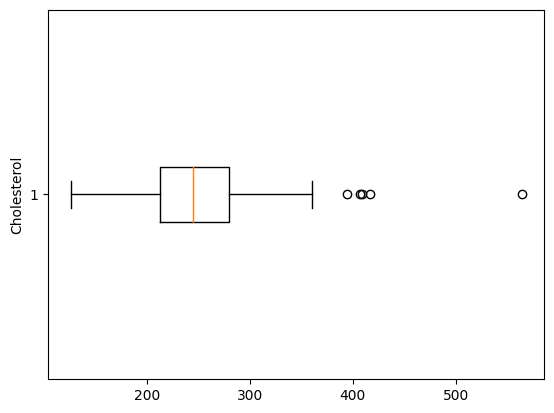

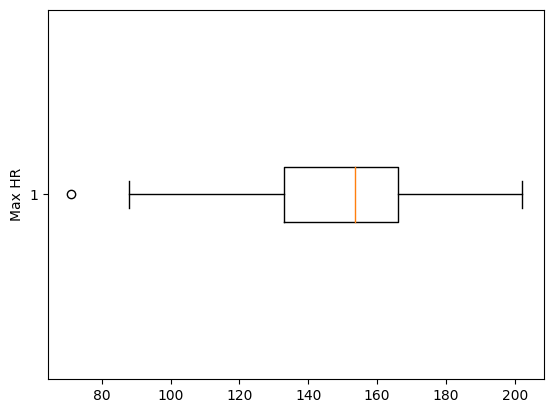

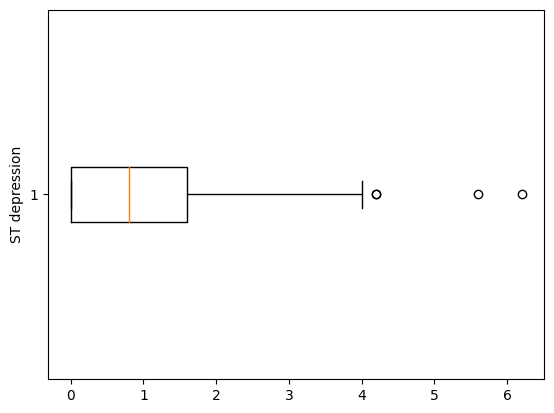

In [ ]:
for i in continuous_val:
  if dict(df.dtypes)[i] == 'int64' or dict(df.dtypes)[i] == 'float64':
    plt.boxplot(df[i],vert = 0)
    plt.ylabel(i)
    plt.show()


Ways of handling extreme values (outliers):

Trimming/removing the outlier
Quantile based flooring and capping
Mean/Median imputation
Outliers here are treated by Median imputation as:

The size of dataset is small and Trimming/removing outliers would further decrease available information
As the mean value is highly influenced by the outliers, it is practice to replace the outliers with the median value.

In [ ]:
outliers =[]
def detect_outliers_zscore(data):
  thres = 3
  mean = np.mean(data)
  std =  np.std(data)
  for i in data:
    z_score = (i-mean)/std
    if(np.abs(z_score) > thres):
      outliers.append(i)

  return outliers

In [ ]:
for i in dict(df.dtypes):
  outliers = []
  if dict(df.dtypes)[i] == 'int64' or dict(df.dtypes)[i] == 'float64':
    sample_outliers = detect_outliers_zscore(df[i])
    print("column : ",i)
    print("Outliers from z_score method :",sample_outliers)
    if(len(sample_outliers) > 0):
      median = np.median(df[i])
      for j in sample_outliers:
        df[i] = np.where(df[i]==j, median, df[i])
    print("After Treatment")
    outliers = []
    sample_outliers = detect_outliers_zscore(df[i])

    print("Outliers from z_score method :",sample_outliers)





column :  Age
Outliers from z_score method : []
After Treatment
Outliers from z_score method : []
column :  BP
Outliers from z_score method : [200, 192]
After Treatment
Outliers from z_score method : []
column :  Cholesterol
Outliers from z_score method : [564, 407, 417, 409]
After Treatment
Outliers from z_score method : [394.0]
column :  Max HR
Outliers from z_score method : [71]
After Treatment
Outliers from z_score method : []
column :  ST depression
Outliers from z_score method : [5.6, 6.2]
After Treatment
Outliers from z_score method : []


**Ways of handling missing data:**

<p>Deleting the entire row</P>
<p>Deleting the Entire Column</P>
<p>Replacing With Arbitrary Value</P>
<p>Replacing With Mean</P>
<p>Replacing With Mode</P>
<p>Replacing With Median</p>
<p>Replacing with Previous Value — Forward Fill</P>
<p>Replacing with Next Value — Backward Fill</P>
<p>Replacing with the Value “missing”, which treats it as a separate Category</P>



This dataset does not have any missing values

**Stepwise feature engineering:**


*   Encoding
*   Feature Selection
*   Binning
*   Feature Scaling

Steps carried out here:

Encoding



In [ ]:

#Encoding
mappings = {}
for i in dict(df.dtypes):
  if dict(df.dtypes)[i] == 'O':
   mappings[i] = dict(zip(df[i].unique(), range(len(df[i].unique()))))
   df[i] = df[i].map(lambda x: mappings[i][x])
df

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,0,0,130.0,322.0,0,0,109.0,0,2.4,0,0,0,0
1,67,1,1,115.0,245.0,0,0,160.0,0,1.6,0,1,1,1
2,57,0,2,124.0,261.0,0,1,141.0,0,0.3,1,1,1,0
3,64,0,0,128.0,263.0,0,1,105.0,1,0.2,0,2,1,1
4,74,1,2,120.0,269.0,0,0,121.0,1,0.2,1,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,0,1,172.0,199.0,1,1,162.0,0,0.5,1,1,1,1
266,44,0,2,120.0,263.0,0,1,173.0,0,0.0,1,1,1,1
267,56,1,2,140.0,294.0,0,0,153.0,0,1.3,0,1,0,1
268,57,0,0,140.0,192.0,0,1,148.0,0,0.4,0,1,2,1


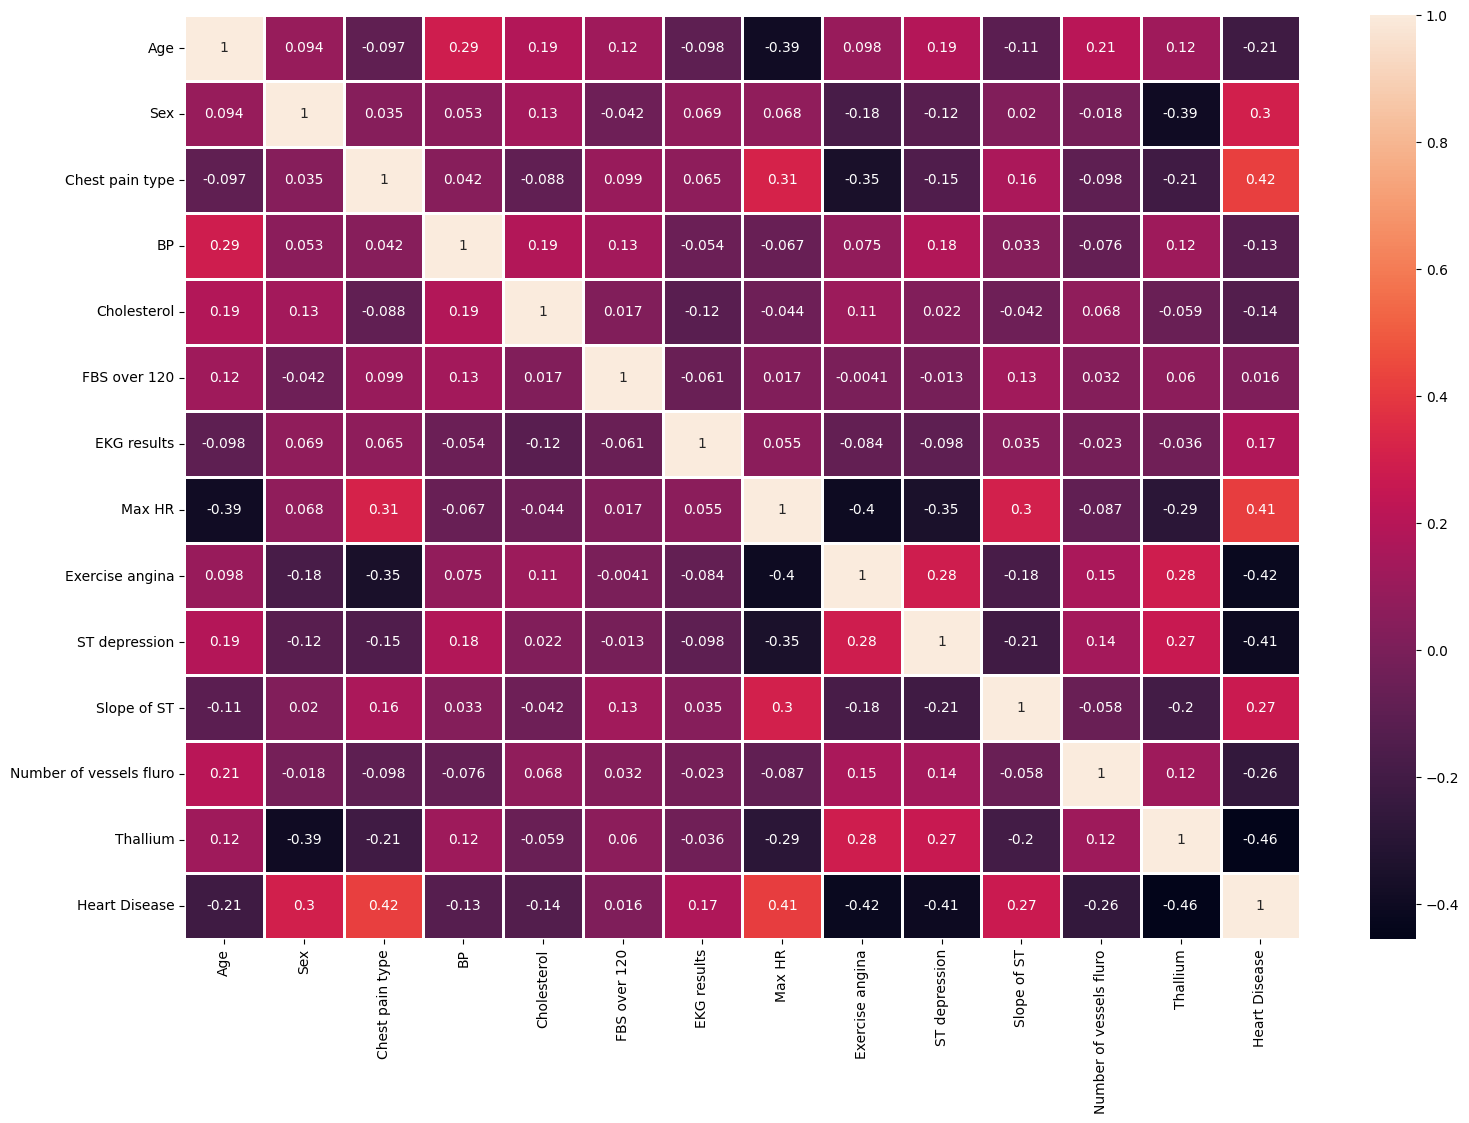

In [ ]:
#Feature selection

plt.figure(figsize = (18, 12))
corr = df.corr()
sns.heatmap(data = corr, annot = True, fmt = '.2g', linewidth = 1)
plt.show()

No strong correlation between any features.So keeping all the features.

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_)

[0.07543501 0.05517718 0.10994594 0.06909424 0.06954631 0.02108179
 0.03755394 0.0819943  0.09748109 0.08763199 0.05748344 0.10217698
 0.1353978 ]


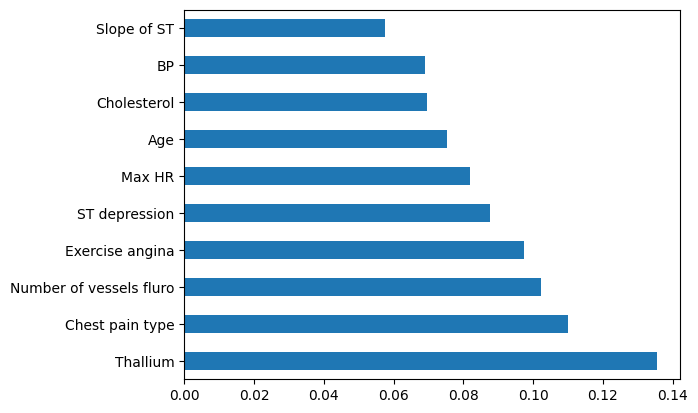

In [ ]:
#Finding 10 most important features
feature_importances = pd.Series(model.feature_importances_, index = x.columns)
feature_importances.nlargest(10).plot(kind = 'barh')
plt.show()

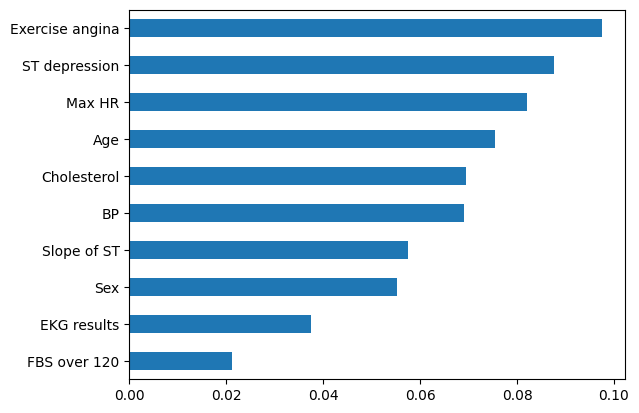

In [ ]:
#Finding 10 least important features
feature_importances.nsmallest(10).plot(kind = 'barh')
plt.show()

Since all colums are with importance > 0.02 ,Keeping all the columns

**Data Analysis and Visualization**

Target vs Independent Features


<Axes: >

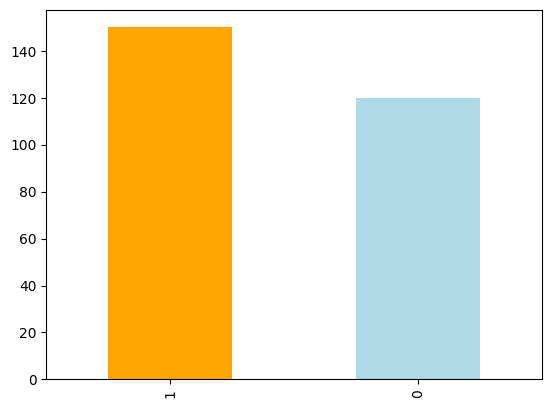

In [ ]:
#understanding the target data balance
df['Heart Disease'].value_counts().plot(kind='bar',color=['orange','lightblue'])


Heart Disease    0   1
Sex                   
0              100  83
1               20  67



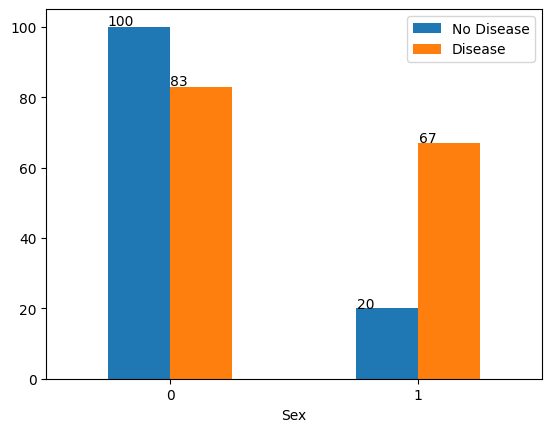


Heart Disease     0   1
Chest pain type        
0                91  38
1                17  62
2                 7  35
3                 5  15



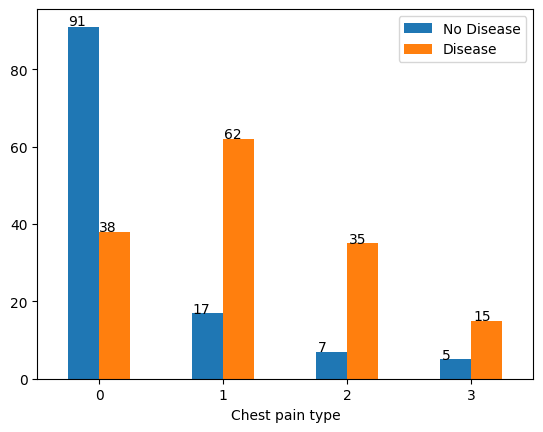


Heart Disease    0    1
FBS over 120           
0              103  127
1               17   23



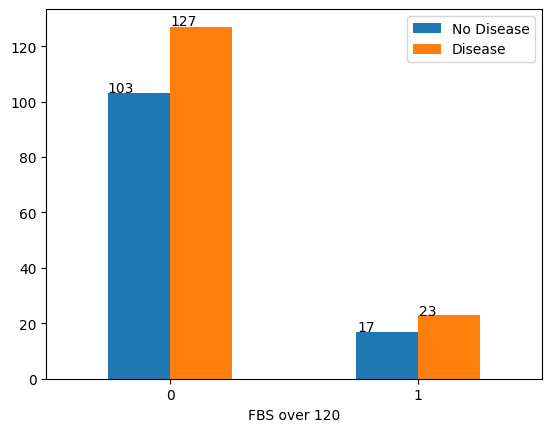


Heart Disease   0   1
EKG results          
0              73  64
1              46  85
2               1   1



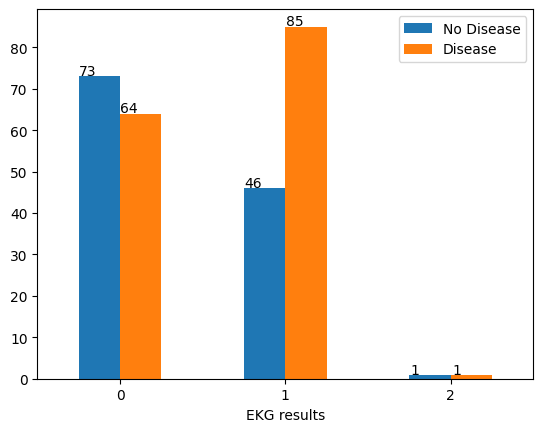


Heart Disease     0    1
Exercise angina         
0                54  127
1                66   23



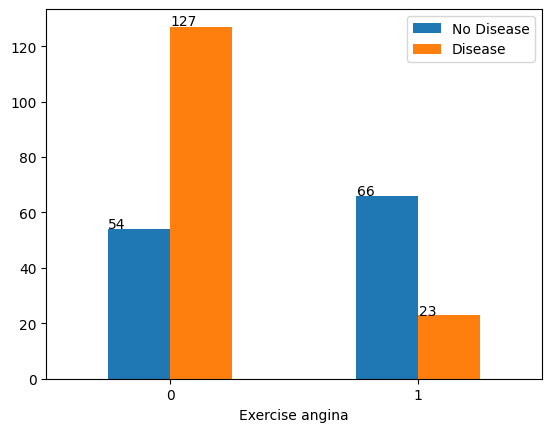


Heart Disease   0   1
Slope of ST          
0              78  44
1              32  98
2              10   8



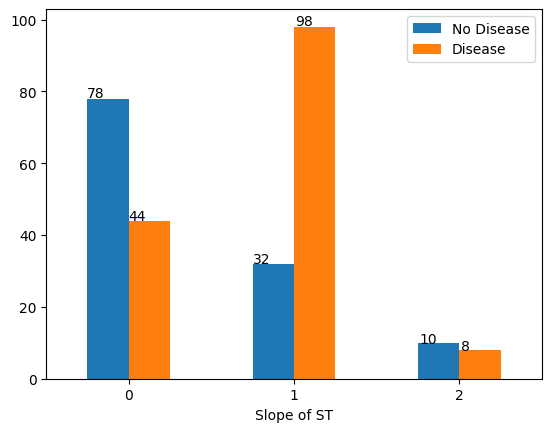


Heart Disease             0    1
Number of vessels fluro         
0                        16    3
1                        40  120
2                        38   20
3                        26    7



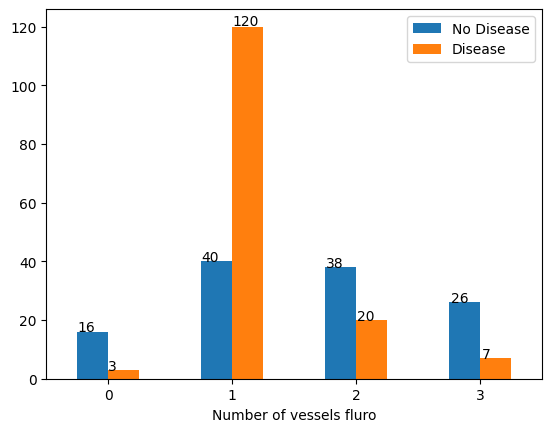


Heart Disease   0    1
Thallium              
0              33  119
1              79   25
2               8    6



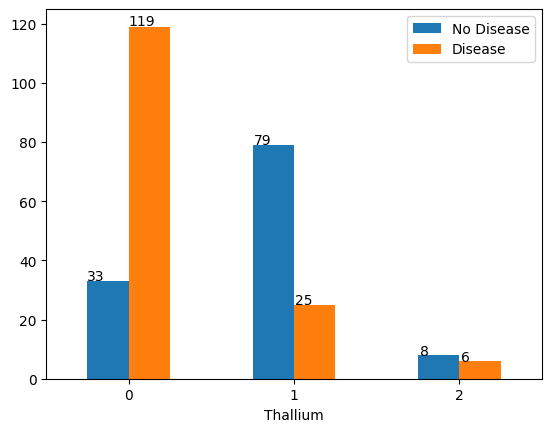


Heart Disease    0    1
Heart Disease          
0              120    0
1                0  150



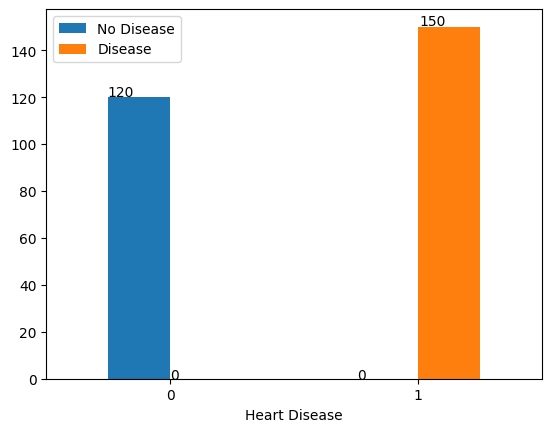

In [ ]:
for i in categorical_val:
  chart = pd.crosstab(index=df[i],columns=df['Heart Disease'])
  print()
  print(chart)
  print()

  ax = chart.plot.bar()
  plt.legend(["No Disease","Disease"]);
  plt.xticks(rotation=0);

  for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
  plt.show()




<p>Except FBS all other features have significant difference in distribution for disease/no disease.FBS might have limited imapct on the target(disease/disease) whereas other features are important indicators for disease/no disease</P>

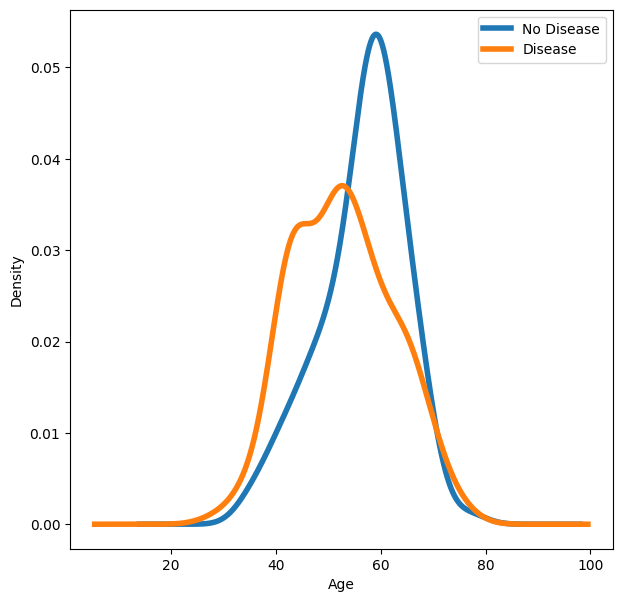

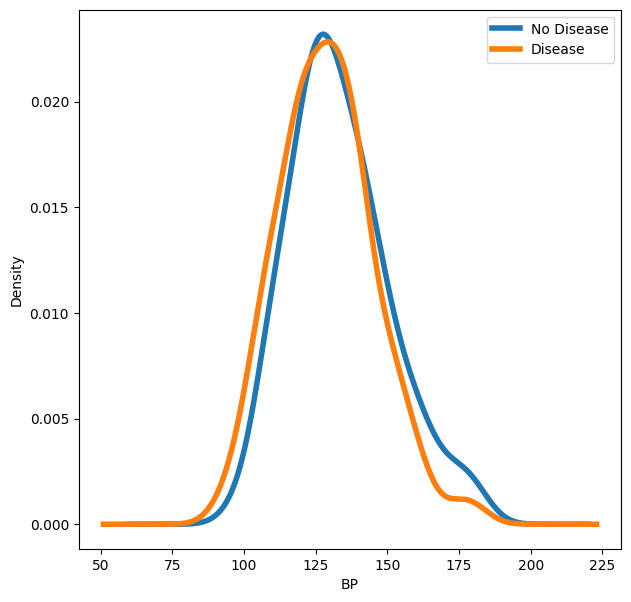

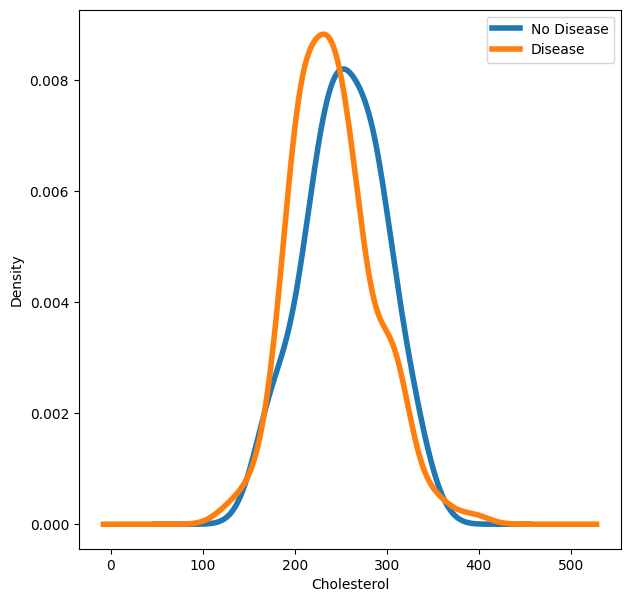

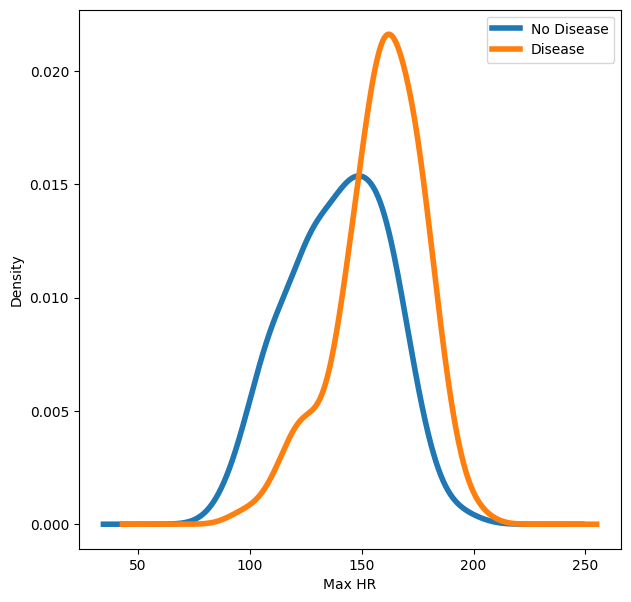

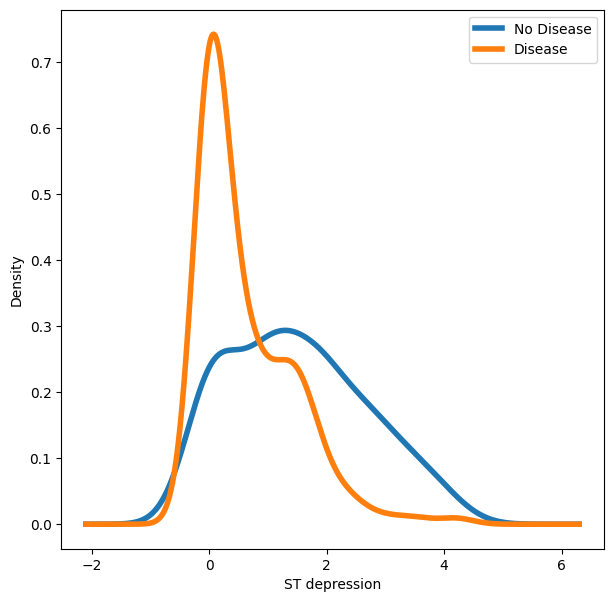

In [ ]:
for i in continuous_val:
   df_specific_column = df.pivot(columns = 'Heart Disease', values = i)
   df_specific_column.plot.density(figsize = (7, 7), linewidth = 4)
   plt.xlabel(i)
   plt.legend(["No Disease","Disease"])
   print()


<p>The distribution plot for age shows patients with heart disease has mean age younger to the patients with no disease.There is shift in the distribution plot of two.</p>
<p>The distribtuion plot for cholestrol overlap mostly for patients with heart disease and no disease.The mean value of cholestrol  for patients with disease is less than the patients with no disease.</p>
<p>The distribution plot for MaxHR shows patients with heart disease has high heart rate compared with patients no disease.</p>
<p>The disribution plot of ST depression shows patients with heart disease has
mean value close to zero but patients with no disease has higher mean.</p>
<p>Except cholestrol all other features have hardly overlapping distribution
for Heart disease/no disease.Therefore data points of that features are important indicators in predicting disease/no disease</p>

# Explanatory Model Building

In [ ]:
#target and features splitting
from sklearn.model_selection import train_test_split
x = df.drop(['Heart Disease'], axis=1)
y = df['Heart Disease']
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
# #Data Normalization

# x = (x - np.min(x)) / (np.max(x) - np.min(x))

Explore training all ML models

In [ ]:
#Import the classifiers from sklearn

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score,roc_curve,auc


#instantiate the classifiers

classifiers = [LogisticRegression(),
               GaussianNB(),
               DecisionTreeClassifier(random_state=42),
               RandomForestClassifier(random_state=42),
               KNeighborsClassifier(),svm.SVC(kernel='linear')]


#Tables for model performance metrics and roc curve metrics

model_metrics = pd.DataFrame(columns=['ClassifierName','Accuracy','Precision','Recall','F1_score'])
roc_metrics = pd.DataFrame(columns=['ClassifierName','FPR','TPR','auc'])


#Train the models and record the rsult

for cls in classifiers:

  model = cls.fit(x_train,y_train)
  y_pred = model.predict(x_test)
  fpr,tpr,threshold = roc_curve(y_test,y_pred)
  auc_roc = auc(fpr,tpr)
  test_accuracy = accuracy_score(y_test,y_pred)
  precision = precision_score(y_test,y_pred)
  f1score = f1_score(y_test,y_pred)
  recall = recall_score(y_test,y_pred)

  roc_metrics = roc_metrics.append({'ClassifierName':cls.__class__.__name__,
                                    'FPR':fpr,
                                    'TPR':tpr,
                                    'auc':auc_roc},ignore_index = True)


  model_metrics = model_metrics.append({'ClassifierName':cls.__class__.__name__,
                                          'Accuracy' : test_accuracy,
                                          'Precision' :precision,
                                          'Recall' : recall,
                                          'F1_score':f1score
                                           },ignore_index = True)
  print('Model Name : ',cls.__class__.__name__ )
  print('classification report: \n' ,classification_report(y_test,y_pred) )
  print('\nConfusion Matrix: \n' ,confusion_matrix(y_test,y_pred) )


#Set name of the classifiers as index of the dataframes

roc_metrics.set_index('ClassifierName',inplace = True)
model_metrics.set_index('ClassifierName',inplace = True)













/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
<ipython-input-79-36433c46330a>:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  roc_metrics = roc_metrics.append({'ClassifierName':cls.__class__.__name__,
<ipython-input-79-36433c46330a>:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_metrics = model_metrics.append({'ClassifierName':cls.__class__.__n

Model Name :  LogisticRegression
classification report: 
               precision    recall  f1-score   support

           0       0.83      0.71      0.77        21
           1       0.83      0.91      0.87        33

    accuracy                           0.83        54
   macro avg       0.83      0.81      0.82        54
weighted avg       0.83      0.83      0.83        54


Confusion Matrix: 
 [[15  6]
 [ 3 30]]
Model Name :  GaussianNB
classification report: 
               precision    recall  f1-score   support

           0       0.88      0.71      0.79        21
           1       0.84      0.94      0.89        33

    accuracy                           0.85        54
   macro avg       0.86      0.83      0.84        54
weighted avg       0.86      0.85      0.85        54


Confusion Matrix: 
 [[15  6]
 [ 2 31]]
Model Name :  DecisionTreeClassifier
classification report: 
               precision    recall  f1-score   support

           0       0.64      0.76      0.

<ipython-input-79-36433c46330a>:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  roc_metrics = roc_metrics.append({'ClassifierName':cls.__class__.__name__,
<ipython-input-79-36433c46330a>:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_metrics = model_metrics.append({'ClassifierName':cls.__class__.__name__,
<ipython-input-79-36433c46330a>:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  roc_metrics = roc_metrics.append({'ClassifierName':cls.__class__.__name__,
<ipython-input-79-36433c46330a>:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_metrics = model_metrics.append({'ClassifierName':cls.__class__.__name__,


Model Name :  RandomForestClassifier
classification report: 
               precision    recall  f1-score   support

           0       0.79      0.71      0.75        21
           1       0.83      0.88      0.85        33

    accuracy                           0.81        54
   macro avg       0.81      0.80      0.80        54
weighted avg       0.81      0.81      0.81        54


Confusion Matrix: 
 [[15  6]
 [ 4 29]]
Model Name :  KNeighborsClassifier
classification report: 
               precision    recall  f1-score   support

           0       0.56      0.71      0.63        21
           1       0.78      0.64      0.70        33

    accuracy                           0.67        54
   macro avg       0.67      0.68      0.66        54
weighted avg       0.69      0.67      0.67        54


Confusion Matrix: 
 [[15  6]
 [12 21]]
Model Name :  SVC
classification report: 
               precision    recall  f1-score   support

           0       0.82      0.67      0.74   

<ipython-input-79-36433c46330a>:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  roc_metrics = roc_metrics.append({'ClassifierName':cls.__class__.__name__,
<ipython-input-79-36433c46330a>:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_metrics = model_metrics.append({'ClassifierName':cls.__class__.__name__,


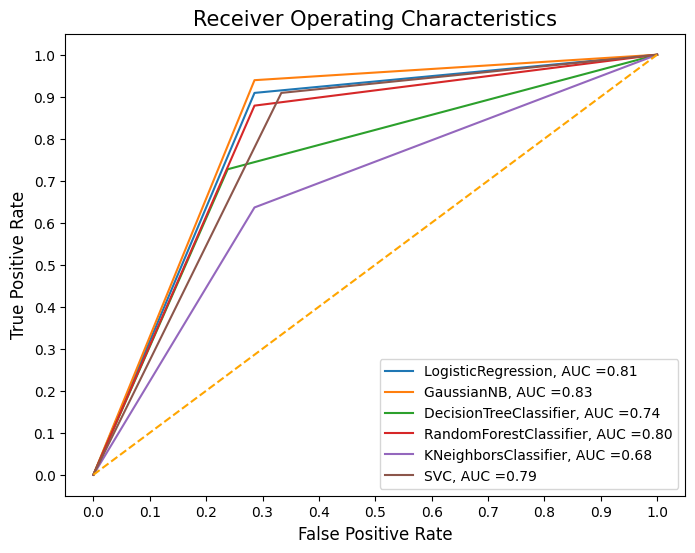

In [ ]:
#Plot ROC curve for the classifiers trained

fig =  plt.figure(figsize=(8,6))

for i in roc_metrics.index:
  plt.plot(roc_metrics.loc[i]['FPR'],
           roc_metrics.loc[i]['TPR'],
           label = "{}, AUC ={:.2F}".format(i,roc_metrics.loc[i]['auc']))

plt.plot([0,1],[0,1],color='orange',linestyle ='--')

plt.xticks(np.arange(0.0,1.1,step=0.1))
plt.xlabel('False Positive Rate',fontsize = 12)

plt.yticks(np.arange(0.0,1.1,step=0.1))
plt.ylabel('True Positive Rate',fontsize = 12)


plt.title('Receiver Operating Characteristics', fontsize = 15)
plt.legend(loc = 'lower right')

plt.show()






In [ ]:
#check the metrics of different classifiers trained
model_metrics


,Accuracy,Precision,Recall,F1_score
ClassifierName,,,,
LogisticRegression,0.833333,0.833333,0.909091,0.869565
GaussianNB,0.851852,0.837838,0.939394,0.885714
DecisionTreeClassifier,0.740741,0.827586,0.727273,0.774194
RandomForestClassifier,0.814815,0.828571,0.878788,0.852941
KNeighborsClassifier,0.666667,0.777778,0.636364,0.700000
SVC,0.814815,0.810811,0.909091,0.857143


<p>GassianNB has highest accuracy ,high recall,high F1_Score and large area under ROC curve of all the models trained.</p>
<p>In medical industry ,it is very imporatant to have high recall(sensitivity) for the positive class(patients with heart disease).A high recall ensures that most of the actual positive cases are correctly identified out of all the positive cases in the dataset</p>
<p>F1 Score for positive class is 0.88, which indicates good precision and good recall.Model did not trade off precision to maximize recall.This means the reduction in False Negatives hasn't significantly increased the False Positives.</P>


Main and Interaction effects

In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.7/535.7 kB 11.4 MB/s eta 0:00:00


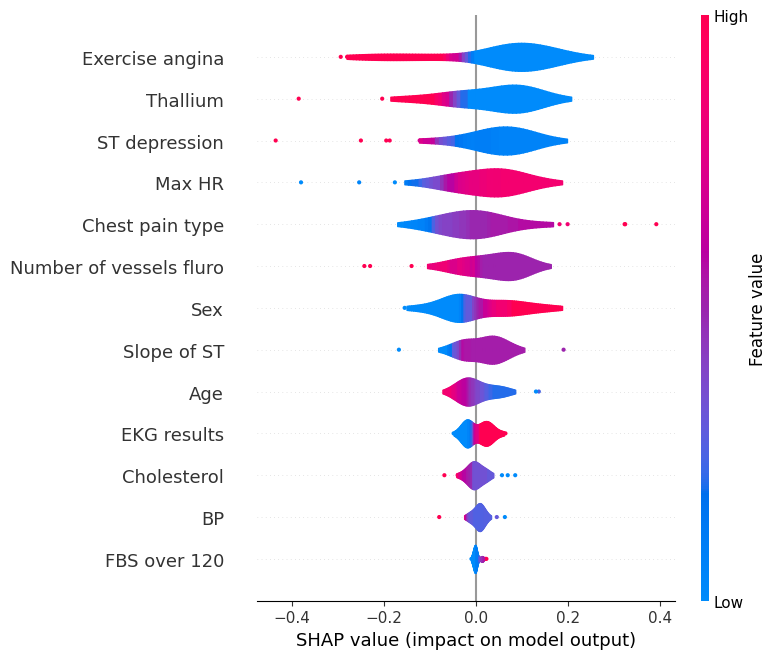

In [ ]:
import shap
shap.initjs()
#Explanatory model
model = GaussianNB()

model = model.fit(x, y)
explainer = shap.Explainer(model.predict,x_train)
shap_values = explainer.shap_values(x_test)
shap.summary_plot(shap_values,x_test, plot_type="violin")




In [ ]:
shap_values.shape

(54, 13)

**HyperParameter Optimization**

GaussianNB parameter cannot be tuned as Naive Bayes does not accept parametres.